# 4. 텍스트의 분포로 벡터화하기

4-1. 들어가며<br>
4-2. 단어 빈도를 이용한 벡터화 (1) Bag of Words<br>
4-3. 단어 빈도를 이용한 벡터화 (2) Bag of Words 구현해보기<br>
4-4. 단어 빈도를 이용한 벡터화 (3) DTM과 코사인 유사도<br>
4-5. 단어 빈도를 이용한 벡터화 (4) DTM의 구현과 한계점<br>
4-6. 단어 빈도를 이용한 벡터화 (5) TF-IDF<br>
4-7. 단어 빈도를 이용한 벡터화 (6) TF-IDF 구현하기<br>
4-8. LSA와 LDA (1) LSA<br>
4-9. LSA와 LDA (2) LSA 실습<br>
4-10. LSA와 LDA (3) LDA<br>
4-11. LSA와 LDA (4) LDA 실습<br>
4-12. 텍스트 분포를 이용한 비지도 학습 토크나이저 (1) 형태소 분석기와 단어 미등록 문제<br>
4-13. 텍스트 분포를 이용한 비지도 학습 토크나이저 (2) soynlp<br>
4-14. 마무리하며

### Keyword

1. Vectorization
    1. BoW(Bag of Word)
        1. Keras Tokenizer
            1. vocavulary
        2. scikit-learn CountVectorizer ~ DTM
    2. DTM
        1. Cosine Similarity
    3. TF-IDF
        1. TfidVectorizer
2. Topic modeling
    1. LSA(Latent Semantic Analysis)
        1. SVD
        2. Truncated SVD
    2. [LDA(Latent Dirichlet Alloction)](https://wikidocs.net/30708)
3. unsupervised learning tokenizer
    1. soynlp
        1. 단어 점수표
            1. 응집확률(cohesion probability)
            2. 브랜칭 엔트로피(branching entropy)
        2. tokenizing
            1. LTokenizer
            2. MaxScoreTokenizer
        

## 4-1. 들어가며
---
### 학습 목표
- 단어 빈도를 이용한 **DTM**과 **TF-IDF**를 구현할 수 있습니다.
- **LSA**, **LDA**의 차이를 설명할 수 있습니다.
- **형태소 분석기**가 왜 필요한지 설명할 수 있습니다.
---

- text vectorization 필요성:
    - 텍스트 데이터를 머신러닝 모델이 이해할 수 있게 수치 데이터로 변환하는 과정
    - array, matrix 형태의 대규모 데이터를 다룰 때, 벡터화 사용하면 속도 빨라지고 메모리 사용량도 줄일 수 있음. 
    - 벡터화는 코드 작성 및 디버깅을 간단하게 만들어주고 가독성을 높임 : 딥러닝 등의 복잡한 모델 구현에 유용


## 4-2. 단어 빈도를 이용한 벡터화 (1) Bag of Words
: 전처리 과정에서 텍스트를 숫자 벡터로 변환하는 **벡터화(Vectorization)**라는 과정을 학습합니다.

- `벡터화(Vectorization)`: 전처리 과정에서 텍스트를 숫자 벡터로 변환하는 과정

#### 두 가지 벡터화 방법
1. 통계와 머신러닝을 활용하는 과정 (이번 노드)
2. 인공 신경망을 활용하는 과정

#### Bag of Words(BoW)
- 문서를 **단어의 집합**으로 나타내는 텍스트 데이터의 **벡터화 기법** 중 하나
- : 텍스트 데이터를 **단어 단위로 분할**하고, 각 단어가 문서에 나타나는 빈도를 계산하여 벡터로 표현하는 방식
- 자연어 처리(Natural Language Processing)나 정보 검색(Information Retrieval)에서 쓰이는 매우 간단한 단어 표현 방법
- 문서 내의 단어들의 **분포**를 보고 이 문서의 특성을 파악하는 기법
- 과정 : 
    1. 문서를 단어들의 가방으로 가정
    2. 어떤 한 문서에 등장하는 텍스트를 전부 단어 단위로 토큰화(tokenization)
    3. 이 단어들을 전부 가방에 집어넣고 순서와 관계없이 섞어줌
    4. 중복을 제거하지 않고 단어를 카운트 -> 단어의 순서를 무시하고 **빈도 정보를 보존**
- 예시:
    ```python
    # 문서 예시
    doc1 = 'John likes to watch movies. Mary likes movies too.'
    doc2 = 'Mary also likes to watch football games.'
    
    # BoW 예시
    '''key: 단어, 
       value: 주어진 문서에 key에 해당하는 단어가 등장한 횟수'''
    BoW1 = {"John":1, "likes":2, "to":1, "watch":1, "movies":2, "Mary":1, "too":1}
    BoW2 = {"Mary":1, "also":1, "likes":1, "to":1, "watch":1, "football":1, "games":1}

    # doc1 + doc2
    doc3 = 'John likes to watch movies. Mary likes movies too. Mary also likes to watch football games.'
    BoW3 = {"John":1, "likes":3, "to":2, "watch":2, "movies":2, "Mary":2, "too":1, "also":1, "football":1, "games":1};
    ```
- 한계: 어순에 따라 달라지는 의미가 반영이 안됨
    - `I ate lunch.` == `Lunch ate I.` 


## 4-3. 단어 빈도를 이용한 벡터화 (2) Bag of Words 구현해보기
: 벡터화(Vectorization) 방법 중 통계와 머신 러닝을 활용한 방법을 학습합니다.
1. keras Tokenizer
2. scikit-learn CountVectorizer

### 1) keras Tokenizer
---

doc: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer

- `keras.preprocessing` -> "Deprecated" ~ 최신버전 API 써봐야할듯

- `단어장(Vocabulary)`: 중복을 제거한 단어들의 집합 (BoW와는 다른 개념, 자연어 처리에서 보편적으로 사용되는 용어)

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer

sentence = ["John likes to watch movies. Mary likes movies too! Mary also likes to watch football games."]

tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentence) # 단어장 생성
bow = dict(tokenizer.word_counts) # word_counts: 각 단어와 각 단어의 빈도를 bow에 저장

print("Bag of Words :", bow) # bow 출력
print('단어장(Vocabulary)의 크기 :', len(tokenizer.word_counts)) # 중복을 제거한 단어들의 개수

Bag of Words : {'john': 1, 'likes': 3, 'to': 2, 'watch': 2, 'movies': 2, 'mary': 2, 'too': 1, 'also': 1, 'football': 1, 'games': 1}
단어장(Vocabulary)의 크기 : 10


### 2) scikit-learn CountVectorizer
---
doc: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

`CounterVectorizer`의 `vector.fit_transform(입력 문장).toarray()`으로 출력되는 Bag of Words 결과를 보면 **각 단어의 빈도만 출력**될 뿐, 어떤 단어의 빈도인지는 나오지 않습니다. `[[1 1 1 1 3 2 2 2 1 2]]`이라는 값만으로는 각 숫자가 어떤 단어의 빈도인지 알 수가 없지요?

이는 `vector.vocabulary_`를 통해서 **각 단어에 부여된 인덱스를 확인**하면 되는데요. 주의할 점은 이 인덱스는 "0"부터 시작한다는 점입니다. 가령, also의 인덱스는 0이네요. 그런데 BoW 결과 리스트에서 0번 인덱스에 해당하는 값은 1이니까, also의 빈도는 1입니다. 또는 likes의 인덱스는 4인데, BoW에서 4번 인덱스에 해당하는 값은 3이니까 likes의 빈도는 3임을 알 수 있지요!

그리고 이 Bag of Words의 단어장의 크기는 아래와 같이 구하면 되겠지요!

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

sentence = ["John likes to watch movies. Mary likes movies too! Mary also likes to watch football games."]

vector = CountVectorizer()
bow = vector.fit_transform(sentence).toarray() # 각 단어의 빈도만 출력

print('Bag of Words : ', bow) # 코퍼스로부터 각 단어의 빈도수를 기록한다.
print('각 단어의 인덱스 :', vector.vocabulary_) # 각 단어의 인덱스가 어떻게 부여되었는지를 보여준다.

Bag of Words :  [[1 1 1 1 3 2 2 2 1 2]]
각 단어의 인덱스 : {'john': 3, 'likes': 4, 'to': 7, 'watch': 9, 'movies': 6, 'mary': 5, 'too': 8, 'also': 0, 'football': 1, 'games': 2}


- `vector.fit_transform(sentence).toarray()` : 각 단어의 빈도만 출력
- `vector.vocabulary_`: 각 단어에 부여된 인덱스 확인

    - `bow = [[1 1 1 1 3 2 2 2 1 2]`] 로부터, 
    
    - 'also': 0 -> `bow[0]`, 빈도수는 "1"
    
    - 'likes':4 -> `bow[4]`, 빈도수는 "3"

In [4]:
# BoW 단어장 크기
print('단어장(Vocabulary)의 크기 :', len(vector.vocabulary_))

단어장(Vocabulary)의 크기 : 10


**BoW는 DTM(Document-Term Matrix)에서 사용됨**

## 4-4. 단어 빈도를 이용한 벡터화 (3) DTM과 코사인 유사도
:코사인 유사도를 학습합니다.

### DTM(Document-Term Matrix)
---
- `DTM(Document-Term Matrix)`: 여러 문서의 Bag of Words를 하나의 행렬로 구현한 것
    - DTM : row-doc, col-term
    - TDM : row-term, col-doc
    
- 예시:
>Doc 1: Intelligent applications creates intelligent business processes<br>
Doc 2: Bots are intelligent applications<br>
Doc 3: I do business intelligence

- DTM:
    - 각 행 `문서 벡터(document vector)` : 각 문서
    - 각 열 `단어 벡터(word vector)` : 문서 3개의 통합 단어장(Vocabuary)에 있는 단어들로 구성
|doc_vec\word_vec|intelligent|applications|creates|business|processes|bots|are|i|do|intelligence|
|:---|:---|:---|:---|:---|:---|:---|:---|:---|:---|:---|
|Doc1|2|1|1|1|1|0|0|0|0|0|
|Doc2|1|1|0|0|0|1|1|0|0|0|
|Doc3|0|0|0|1|0|0|0|1|1|1|
    
이렇게 구성하면 앞서 문서 1개로 BoW를 만들었을 때와는 달리, 각 행에는 "`0`"이 많이 포함됩니다.

- 문서의 수가 많아지면 많아질수록, 통합 단어장의 크기도 커지게 되어서 
- DTM은 결국 문서 벡터와 단어 벡터 모두 **"대부분의 값이 0"**이 되는 성질을 가지고 있습니다.

- DTM을 사용하면 각 문서들을 비교하고, 각 문서 간 "유사도"를 구할 수 있게 됩니다. 예를 들어볼까요?


### cosine similarity
---
- [코사인 유사도](https://wikidocs.net/24603) : 두 벡터 간의 코사인 각도를 이용하여 구할 수 있는 두 벡터의 유사도
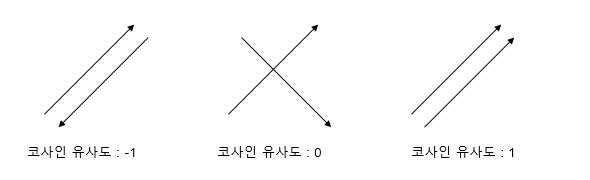
- 같은 방향 벡터 : `cos(0) = 1`
- 반대 방향 벡터 : `cos(π) = -1`
- 직각 벡터 : `cos(π/2) = 0`

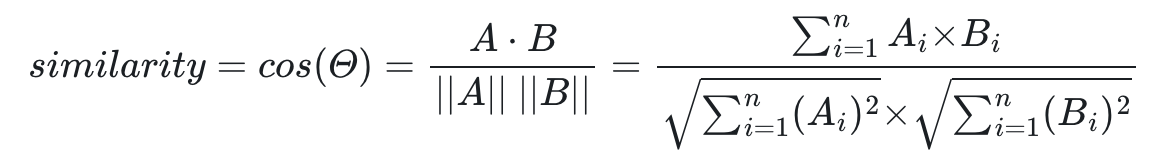
- A, B : vector
- norm -> euclidean


---
#### [예제]

>문서1 : I like dog<br>
문서2 : I like cat<br>
문서3 : I like cat I like cat

||cat|dog|i|like|
|:---|:---|:---|:---|:---|
|문서1|0|1|1|1|
|문서2|1|0|1|1|
|문서3|2|0|2|2|


In [5]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

doc1 = np.array([0,1,1,1]) # 문서1 벡터
doc2 = np.array([1,0,1,1]) # 문서2 벡터
doc3 = np.array([2,0,2,2]) # 문서3 벡터

def cos_sim(A, B):
    return dot(A, B)/(norm(A)*norm(B)) # cos(θ) 정의

DTM에서 코사인 유사도는 0 이상 1 이하의 값을 가지며 값이 1에 가까울수록 유사도가 높다고 판단

In [6]:
print('{:.2f}'.format(cos_sim(doc1, doc2))) #문서1과 문서2의 코사인 유사도
print('{:.2f}'.format(cos_sim(doc1, doc3))) #문서1과 문서3의 코사인 유사도
print('{:.2f}'.format(cos_sim(doc2, doc3))) #문서2과 문서3의 코사인 유사도

0.67
0.67
1.00


## 4-5. 단어 빈도를 이용한 벡터화 (4) DTM의 구현과 한계점
: DTM(Document-Term Matrix)이 가지고 있는 "두 가지 한계점"을 학습합니다.

- DTM 구현: `scikit-learn CountVectorizer` 활용
사이킷런의 CountVectorizer를 이용하여 DTM을 만드는 방법은 앞서 Bag of Words를 만드는 방법과 동일합니다. <br>
단지, **"다수의 문서"**를 입력값으로 주면 됩니다. 

다음은 3개의 문서에 대해서 DTM을 만드는 과정을 보여줍니다.

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
    'John likes to watch movies',
    'Mary likes movies too',
    'Mary also likes to watch football games',    
]
vector = CountVectorizer() # class instance

print(vector.fit_transform(corpus).toarray()) # 코퍼스로부터 각 단어의 빈도수를 기록. -> DTM
print(vector.vocabulary_) # 각 단어의 인덱스가 어떻게 부여되었는지를 보여준다. -> 그냥 단어장

[[0 0 0 1 1 0 1 1 0 1]
 [0 0 0 0 1 1 1 0 1 0]
 [1 1 1 0 1 1 0 1 0 1]]
{'john': 3, 'likes': 4, 'to': 7, 'watch': 9, 'movies': 6, 'mary': 5, 'too': 8, 'also': 0, 'football': 1, 'games': 2}


#### DTM 한계점:

1. 문서, 단어의 수가 늘어날 수록 0에 가까워짐 -> 메모리 낭비,,, 지나친 차원의 크기 -> 차원의 저주 발생
2. 방법 자체가 단어의 빈도에만 집중 -> 
    - eg. "the" : the(stopword)가 두 문서에 많이 나왔다고 두 문서가 유사하다고 볼 수 없음

사실 여러 문서에는 중요한 단어와 중요하지 않은 단어들이 혼재되어 있는데, 'the'와 같이 아무 문서에나 자주 등장하는 단어들은 문서끼리 비교할 때 그다지 도움이 되지 않습니다. 그렇다면 
- "중요한 단어"와 "중요하지 않은 단어"에 **가중치를 따로** 선별해서 주는 방법은 없을까요? : **`"TF-IDF"`**

## 4-6. 단어 빈도를 이용한 벡터화 (5) TF-IDF
:단어의 중요도를 판단하여 가중치를 주는 방법인 TF-IDF를 학습합니다.

### TF-IDF 란
---
- `TF-IDF`: Term Frequency-Inverse Document Frequency... '단어의 빈도' 와 '문서의 빈도의 역수' ?
    - **모든 문서**에서 자주 등장하는 단어는 **중요도가 낮다고 판단**하며, 
    - **특정 문서**에서만 자주 등장하는 단어는 **중요도가 높다고 판단**하는 것
    
    
TF-IDF는 "불용어"처럼 중요도가 낮으면서 모든 문서에 등장하는 단어들이 "노이즈"가 되는 것을 완화해 줍니다. 

주의할 점은 TF-IDF를 사용하는 것이 DTM을 사용하는 것보다 성능이 항상 뛰어나지는 않다는 점입니다. 

TF-IDF를 사용하기 위해서는 우선 DTM을 만든 뒤에 **`TF-IDF 가중치`**를 `"DTM에 적용"`합니다.

단어의 빈도를 의미하는 TF는 사실 이미 배웠습니다. DTM이 "이미 TF 행렬"이기 때문이죠! 

그리고 **DTM의 "각 단어에 `IDF 값`"을 곱해주면 TF-IDF 행렬이 완성**됩니다.


### TF-IDF 계산하기
---
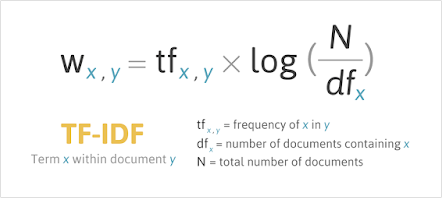

- `x`: term in y

- `y`: document

- `W_xy` : 특정 문서에서 특정 단어의 중요도 ~ 그 특정 문서에서"만" 더 자주 등장하는 단어가 중요하다는 개념

- `tf_xy` : **TF**값. document y에서 term x의 빈도 ~ DTM이 이미 TF행렬

- `log(N/df_x)` : **IDF**값. DTM의 각 단어에 IDF값(weight?)을 곱해주면, TF-IDF matrix

- `N` : 전체 document수. DTM의 row 수가 되는듯

- `df_x`: x가 포함된 document 수

#### 예제
>(1) 다섯개의 문서 중, 문서2, 문서3에 like가 200번, 300번 등장한다.(다른 문서에는 x) 이 때 단어 like의 IDF는?
>- `N=5`, `df_x=2` -> `IDF = log(5/2)`
>
>(2) 문서2, 문서3에서 like의 TF-IDF값은?
>- 문서2에서 like의 `TF = 200` / `TF-IDF = 200 x log(5/2)` : 183.258146375
>
>- 문서3에서 like의 `TF = 300` / `TF-IDF = 300 x log(5/2)` : 274.887219562

### TF-IDF로 문서의 유사도 구하는 법
---
: BoW에서 빈도수 대신 **각 단어의 TF-IDF값의 matrix**를 구해서 cosine similarity를 구하는 방법. 

- BoW를 통해 문서의 유사도 구하는 두가지 방법
    1. 빈도수
    2. TF-IDF


## 4-7. 단어 빈도를 이용한 벡터화 (6) TF-IDF 구현하기
: TF-IDF를 구현합니다.


### TF-IDF 구현
---
1. 라이브러리 불러오기, 문서 지정, 
2. 단어장(리스트) 만들기 - DTM column
3. 총 문서 수 N에 할당 ~ IDF 함수 작성, TF-IDF matrix 구현에 사용
4. 함수 작성: TF, IDF, TF-IDF
5. DTM 만들기 ~ pd.DataFrame
6. 각 단어의 IDF구하기
7. TF-IDF 행렬 출력: DTM에 있는 각 단어의 TF에 각 단어의 IDF를 곱해준 값


In [8]:
# 필요한 라이브러리 import

from math import log
import pandas as pd
print('=3')

=3


In [9]:
# 문서 세개
docs = [
  'John likes to watch movies and Mary likes movies too',
  'James likes to watch TV',
  'Mary also likes to watch football games',  
]
print('=3')

=3


In [10]:
# DTM의 column을 만들기 위해서 문서 3개의 단어들이 모두 들어간 통합 단어장

vocab = list(set(w for doc in docs for w in doc.split())) # set으로 중복 제거
vocab.sort() # 오름차순으로 정렬
print('단어장의 크기 :', len(vocab))
print(vocab)

단어장의 크기 : 13
['James', 'John', 'Mary', 'TV', 'also', 'and', 'football', 'games', 'likes', 'movies', 'to', 'too', 'watch']


In [11]:
# 총 문서의 수를 변수 N에다가 저장

N = len(docs) # 총 문서의 수
N

3

In [12]:
# TF 함수, IDF 함수, TF-IDF 함수 작성

# TF : 문서 d에서 단어 t의 갯수
def tf(t, d):
    '''t: term, d: document'''
    return d.count(t) # d에서 term의 수

# IDF : log(N/df). IDF값
def idf(t):
    df = 0
    for doc in docs:
        df += t in doc # True or False 반환. doc안에 t가 있으면 df + 1 -> 모든 문서를 훑어 t가 포함된 문서의 갯수만 저장
    return log(N/(df + 1)) + 1 ### ZeroDivisionError, TF-IDF = 0 방지

# TF-IDF
def tfidf(t, d):
    return tf(t,d)* idf(t)

In [13]:
a = 0
print(a)
a = a+True
print(a)
a = a+False
print(a)

0
1
1


#### IDF에서 "+1" ?

여기서 IDF를 실제 구현할 때는 앞서 배운 식과는 다소 다른 식을 사용하게 됩니다. 실제로 많은 파이썬 패키지들이 앞에서 배운 식에서 조금씩 조정된, 서로 다른 식을 사용합니다.

우선, 여기서는 

- log 항의 분모에 1을 더해주겠습니다. 이는 (Bag of Words를 사용할 때 일반적인 상황은 아니지만) 
    - 특정 단어가 전체 문서에서 등장하지 않을 경우에 
    - **분모가 0이 되는 상황을 방지**하기 위함입니다. -> ZeroDivisionError 방지
    
그리고 

- log 항에 1을 더해주겠습니다. 이는 
    - log 항의 분자와 분모값이 동일해졌을 때, 
    - log의 진수가 1이 됨에 따라서 
    - **IDF의 값이 0이 되는 것을 방지**하기 위함입니다. -> TF-IDF값이 0이 되버림

In [14]:
# DTM 만들기

result = []
for i in range(N): # 각 문서에 대해서 아래 명령을 수행
    result.append([]) # 매 iter마다 새로운 빈 vector 생성(문서 row)
    d = docs[i]
    for j in range(len(vocab)): # column 수 -> 단어 갯수 동안,,,
        t = vocab[j]
        result[-1].append(tf(t, d)) # tf(t, d) -> 빈도수 반환, result[-1] : [[doc1],[doc2],[여기에 빈도수 저장]]
        
tf_ = pd.DataFrame(result, columns = vocab)
tf_

,James,John,Mary,TV,also,and,football,games,likes,movies,to,too,watch
0,0,1,1,0,0,1,0,0,2,2,2,1,1
1,1,0,0,1,0,0,0,0,1,0,1,0,1
2,0,0,1,0,1,0,1,1,1,0,1,0,1


In [15]:
l = []
l.append([])
print(l)

[[]]


In [16]:
# 각 단어의 IDF구하기

result = []
for j in range(len(vocab)):
    t = vocab[j]
    result.append(idf(t)) # t의 idf값을 result에 넣어줌

idf_ = pd.DataFrame(result, index = vocab, columns=["IDF"])
idf_

,IDF
James,1.405465
John,1.405465
Mary,1.000000
TV,1.405465
also,1.405465
and,1.405465
football,1.405465
games,1.405465
likes,0.712318
movies,1.405465


In [17]:
# TF-IDF 행렬을 출력: DTM에 있는 각 단어의 TF에 각 단어의 IDF를 곱해준 값 ~ DTM만들때랑 같은과정

result = []
for i in range(N):
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]
        
        result[-1].append(tfidf(t,d)) # tf함수 대신 tfidf함수로 TF-IDF array리스트 생성

tfidf_ = pd.DataFrame(result, columns = vocab)
tfidf_

,James,John,Mary,TV,also,and,football,games,likes,movies,to,too,watch
0,0.000000,1.405465,1.0,0.000000,0.000000,1.405465,0.000000,0.000000,1.424636,2.81093,1.424636,1.405465,0.712318
1,1.405465,0.000000,0.0,1.405465,0.000000,0.000000,0.000000,0.000000,0.712318,0.00000,0.712318,0.000000,0.712318
2,0.000000,0.000000,1.0,0.000000,1.405465,0.000000,1.405465,1.405465,0.712318,0.00000,0.712318,0.000000,0.712318


### scikit-learn TFidVectorizer 활용: "TfidfVectorizer"
---
사이킷런으로 DTM을 만들기 위해서는 `CountVectorizer`를 사용했었습니다. 이와 유사하게 사이킷런에서는 TF-IDF를 "자동으로" 계산하여 출력하는 `TfidfVectorizer`를 제공합니다.

향후 실습 중에 결괏값이 예상과 달라 혼란이 일어나는 일이 없도록 미리 언급하자면, 사이킷런의 `TfidfVectorizer` 또한 이번에 배운 기본식에서 조정된 식을 사용합니다. 간단히 언급하면, `TfidfVectorizer`는 위에서 우리가 파이썬으로 구현한 식에서 더 나아가 log 항의 분자에도 1을 더해주며, TF-IDF의 결과에 `L2 Norm`까지 추가로 수행한다는 점이 다릅니다.

사이킷런의 `TfidfVectorizer`를 통해 TF-IDF 행렬을 출력해봅시다.

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
  'John likes to watch movies and Mary likes movies too',
  'James likes to watch TV',
  'Mary also likes to watch football games',  
]

tfidfv = TfidfVectorizer().fit(corpus)
vocab = list(tfidfv.vocabulary_.keys()) # 단어장을 리스트로 저장. vocabulary_ 속성은 단어와 해당 인덱스 사이의 매핑을 제공
'''
Attribute ~ vocabulary_: dict
A mapping of terms to feature indices.
'''
vocab.sort() # 단어장을 알파벳 순으로 정렬

# TF-IDF 행렬에 단어장을 데이터프레임의 열로 지정하여 데이터프레임 생성
tfidf_ = pd.DataFrame(tfidfv.transform(corpus).toarray(), columns = vocab)
tfidf_

,also,and,football,games,james,john,likes,mary,movies,to,too,tv,watch
0,0.000000,0.321556,0.000000,0.000000,0.000000,0.321556,0.379832,0.244551,0.643111,0.189916,0.321556,0.000000,0.189916
1,0.000000,0.000000,0.000000,0.000000,0.572929,0.000000,0.338381,0.000000,0.000000,0.338381,0.000000,0.572929,0.338381
2,0.464997,0.000000,0.464997,0.464997,0.000000,0.000000,0.274634,0.353642,0.000000,0.274634,0.000000,0.000000,0.274634


## 4-8. LSA와 LDA (1) LSA
: DTM이나 TF-IDF의 문제점을 해결할 수 있는 LSA(Latent Semantic Analysis)를 학습합니다.

---
DTM과 TF-IDF 행렬같이 Bag of Words를 기반으로 한 표현 방법은 근본적으로 
- `단어의 "의미"를 "벡터"로 표현하지 못한다`는 한계를 가지고 있습니다.

가령, 일반적인 검색 작업에서 특정 단어들이 포함된 문서들을 단순히 찾아내는 것은 아주 빠르게 해낼 수 있습니다. 

그런데 **특정 단어(단어의 의미)와 관련된 문서 집합(문서의 주제)**을 찾아내고 싶다면 어떨까요? 단어들의 빈도가 아닌 `의미와 주제`를 알고 싶다면 어떻게 해야 할까요? 이는 DTM이나 TF-IDF 만으로는 풀기 어려운 문제입니다. 이를 해결할 수 있는 `LSA(Latent Semantic Analysis)` 에 대해 알아봅시다.



### LSA(Latent Semantic Analysis)
---
- `LSA(Latent Semantic Analysis)`: 잠재 의미 분석. 전체 코퍼스에서 문서 속 단어들 사이의 **관계**를 찾아내는 자연어 처리 정보 **검색** 기술
    - 단어와 단어 사이, 문서와 문서 사이, 단어와 문서 사이의 **의미적 유사성 점수**를 찾아낼 수 있습니다. 
    - 그리고 이 방법은 어떤 문서에서 특정 단어들의 빈도가 몇인지를 판단하는 것보다 효과적인 경우가 많습니다.
    
    

### SVD(Singular Value Decompotion): 특잇값 분해
---
>[머신러닝 - 19. 고유값(eigenvalue), 고유벡터(eigenvector), 고유값 분해(eigen decomposition)](https://bkshin.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-19-%ED%96%89%EB%A0%AC?category=1057680)
>
>- 전치 행렬(Transposed Matrix): 원래의 행렬에서 행과 열을 서로 맞바꾼 행렬
>- 단위 행렬(Identity Matrix): 주대각 성분이 모두 1이며 나머지 성분은 모두 0인 정사각행렬
>- 역 행렬(Inverse Matrix): A와 어떤 행렬을 곱했을 때 결과가 단위행렬이라면, 이때 어떤 행렬을 A의 역행렬이라고 합니다.
>- 직교 행렬(Orthogonal Matrix): 행렬 A와 A의 전치 행렬을 곱했을 때 단위 행렬이 된다면, A를 직교 행렬이라고 합니다.
>- 대각 행렬(Diagonal Matrix): 대각 성분 이외의 모든 성분이 0인 행렬을 대각 행렬
>- 정방 행렬(Square Matrix): 열과 행의 개수가 동일한 행렬
>- 대칭 행렬(Symmetric Matrix): 정사각행렬 A와 A의 전치 행렬이 서로 같다면, A를 대칭 행렬이라고 합니다.

#### 특잇값 분해(Singular Value Decomposition, SVD) 란 
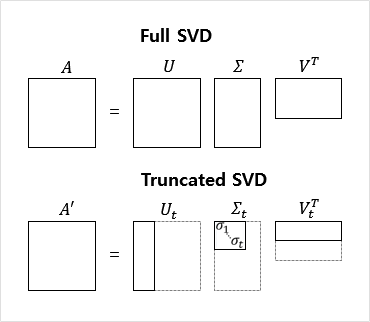
 `m × n` 크기의 임의의 사각 행렬 A를 위의 그림의 Full SVD와 같이 특이 벡터(singular vector)의 행렬와 특잇값(singular value)의 대각행렬로 분해하는 것을 말합니다.

- [데이터 사이언스 스쿨: 특잇값 분해](https://datascienceschool.net/02%20mathematics/03.04%20%ED%8A%B9%EC%9E%87%EA%B0%92%20%EB%B6%84%ED%95%B4.html)
>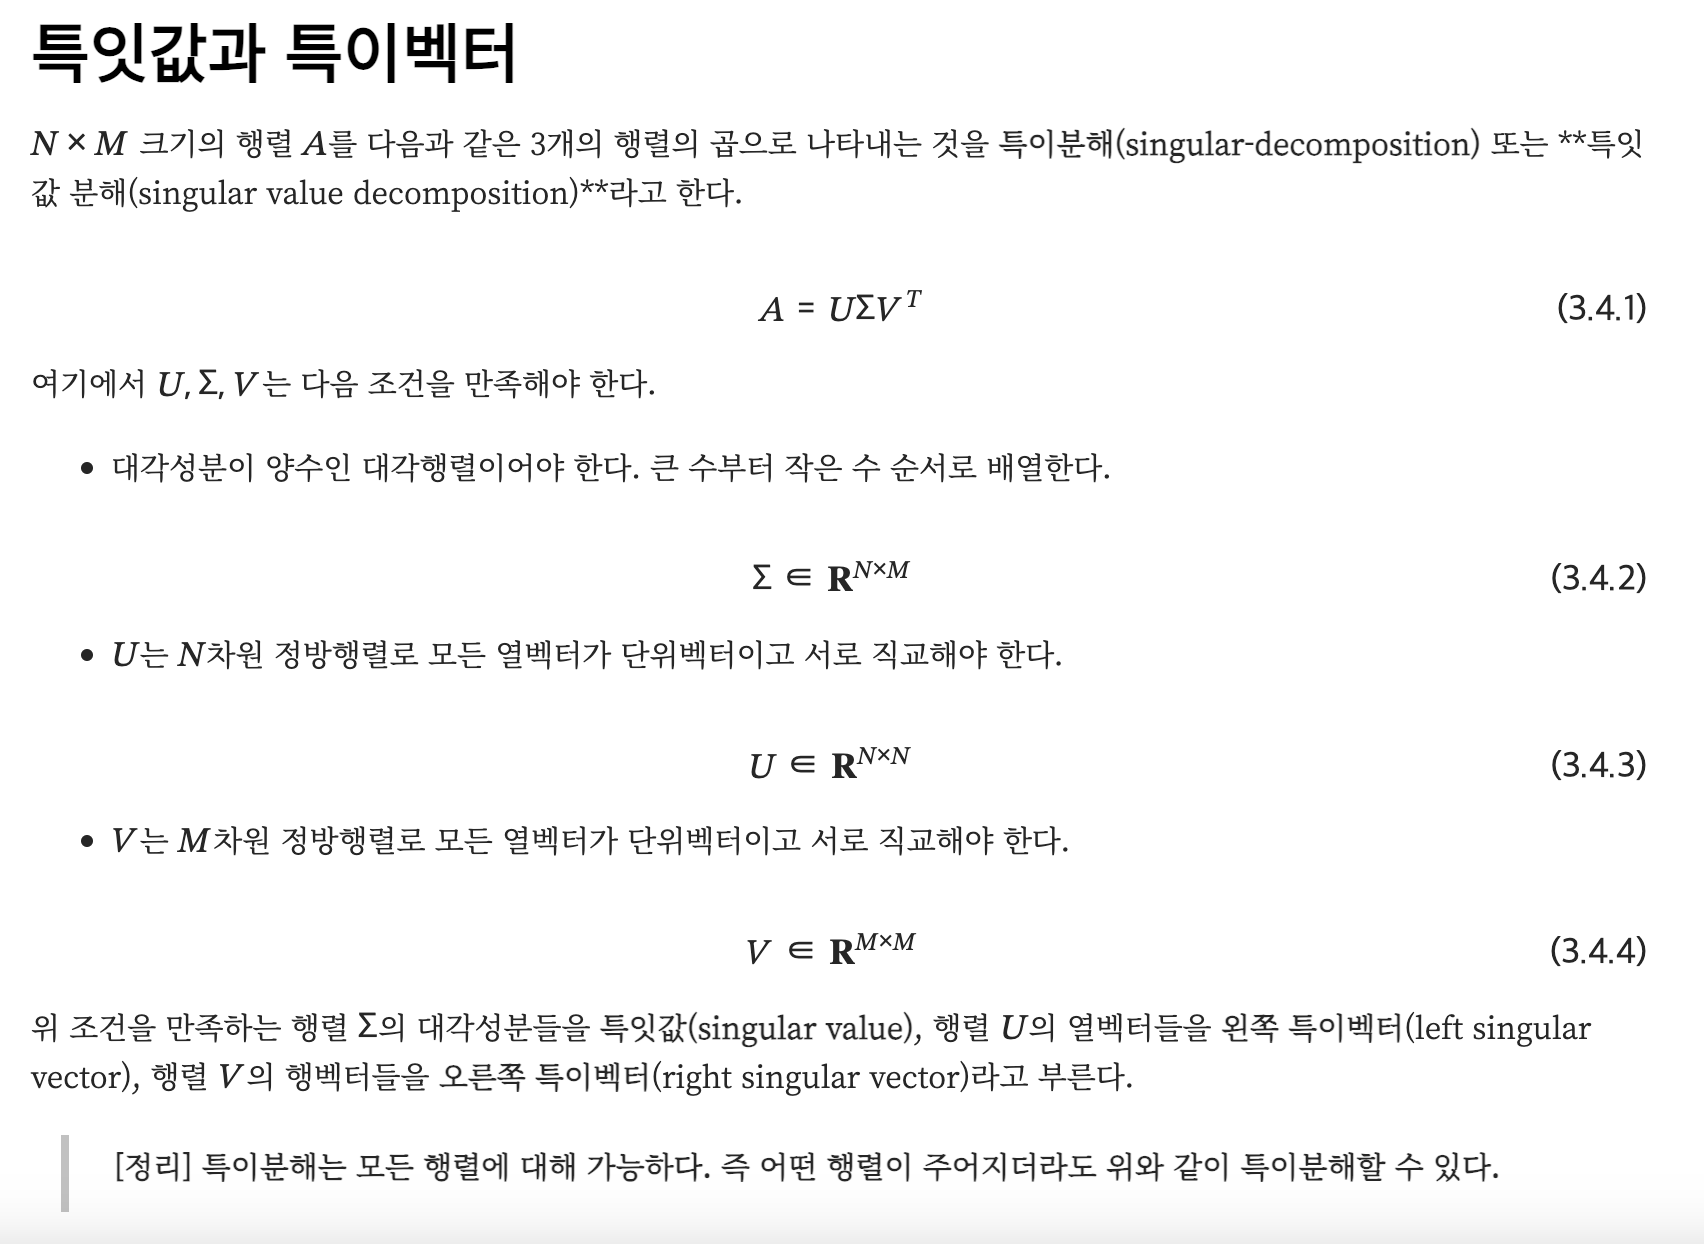


### Truncated SVD: 
- 특잇값 가운데 가장 큰(다시 말해, 가장 중요한) `t`개만 남기고 해당 특잇값에 대응되는 `특이 벡터(singular vector)` 들로 행렬 A를 `근사(approximate)` 하도록 하면, 
- 이를 절단된 특잇값 분해(`Truncated SVD`) 라고 합니다.


Truncated SVD를 수행하면 행렬 Σ의 대각 원솟값 중에서 **`상윗값 t개만 남게`** 되며, 

U행렬과 V행렬의 `t열까지만` 남습니다. 이로 인해 세 행렬에서 값(정보)의 손실이 일어나 기존의 행렬 A를 정확히 복구할 수는 없게 됩니다.

여기서 t는 하이퍼파라미터입니다. 하이퍼파라미터란 사용자가 직접 값을 선택하며 성능에 영향을 주는 매개변수를 말합니다. 

- t를 크게 잡으면 기존의 행렬 A로부터 다양한 의미를 가져갈 수 있지만, 
- 노이즈를 제거하려면 t를 작게 잡아야 합니다.



### LSA와 Truncated SVD
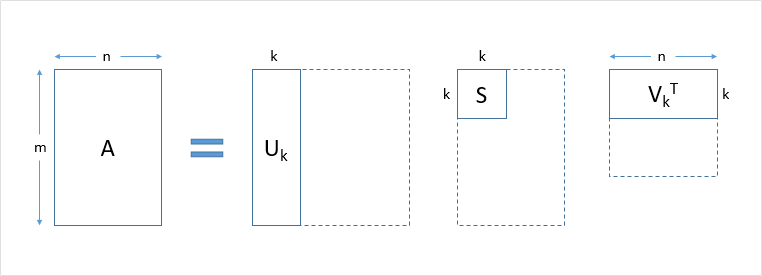

- `LSA`": **DTM**이나 **TF-IDF 행렬** 등에 `Truncated SVD`를 수행
- 이렇게 분해하여 얻은 행렬 3개:
    - `Uk`: **문서**들과 관련된 의미들을 표현한 행렬
    - `Vk^t`: **단어**들과 관련된 의미를 표현한 행렬
    - `S`: 각 **의미의 중요도**를 표현한 행렬'
    
- m : 문서의 수
- n : 단어의 수

Truncated SVD를 통해 얻은 행렬 
- `Uk`는 `m x k`의 크기를 가짐 -> 각 행은 각 문서를 표현하는 문서 벡터
- `Vk^t`는 `k x n`의 크기를 가짐 -> 각 열은 각 단어를 표현하는 n차원의 단어 벡터
    - 단어의 "벡터 크기"가 m에서 k로 축소됨 ~ 차원축소 ~ 잠재된 의미, 임베딩
    
DTM이나 TF-IDF 행렬에 Truncated SVD를 수행하고 얻은 <br>
`Vk^t` 행렬의 `k`열은 전체 코퍼스로부터 얻어낸 `k개의 주요 주제(topic)` 라고 간주할 수도 있습니다.
- ->하나의 단어를 k개의 주제로 표현할 수 있음

이제 실습을 통해 텍스트 데이터로부터 k개의 주제를 얻어내는 LSA 실습을 수행해봅시다.

## 4-9. LSA와 LDA (2) LSA 실습
:LSA(Latent Semantic Analysis)를 실습합니다.

---


In [19]:
import pandas as pd
import numpy as np
import urllib.request
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
print('=3')

=3


`NLTK 데이터셋`을 다운로드하지 않은 상태라면 아래의 커맨드를 통해 다운로드해 줍니다. NLTK는 데이터셋을 다운로드해 주지 않으면 NLTK의 도구들이 제대로 동작하지 않습니다.

In [20]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /aiffel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /aiffel/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /aiffel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### 1) 데이터 다운로드 및 확인

In [3]:
# 실습을 위한 데이터 다운로드 

import os

csv_filename = os.getenv('HOME')+'/aiffel/topic_modelling/data/abcnews-date-text.csv'

urllib.request.urlretrieve("https://raw.githubusercontent.com/franciscadias/data/master/abcnews-date-text.csv", 
                           filename=csv_filename)

('/aiffel/aiffel/topic_modelling/data/abcnews-date-text.csv',
 <http.client.HTTPMessage at 0x7fa9fc1a6ca0>)

In [22]:
# 다운받은 데이터를 데이터프레임에 저장, 크기 확인
data = pd.read_csv(csv_filename, on_bad_lines='skip')
data.shape

(1082168, 2)

In [23]:
data.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


In [24]:
# publish_date는 이번 실습에 불필요하므로 headline_text만 별도로 저장합니다.
text = data[['headline_text']].copy()
text.head()

,headline_text
0,aba decides against community broadcasting lic...
1,act fire witnesses must be aware of defamation
2,a g calls for infrastructure protection summit
3,air nz staff in aust strike for pay rise
4,air nz strike to affect australian travellers


In [25]:
# 데이터 중복 확인
text.nunique() # 중복을 제외하고 유일한 시퀀스를 가지는 샘플의 개수를 출력

headline_text    1054983
dtype: int64

In [26]:
# 중복 제거
text.drop_duplicates(inplace=True) # 중복 샘플 제거
text.reset_index(drop=True, inplace=True) # 인덱스 재설정
text.shape

(1054983, 1)

### 2) 데이터 정제 및 정규화
이제 텍스트 데이터를 정제 및 정규화하는 과정을 진행해 보겠습니다. 
우선 **NLTK의 토크나이저**를 이용해 전체 텍스트 데이터에 대해서 
1. 단어 토큰화를 수행

하고, **NLTK가 제공하는 불용어 리스트**를 사용하여 

2. 불용어를 제거합니다.



In [27]:
# NLTK 토크나이저를 이용해서 토큰화
text['headline_text'] = text.apply(lambda row: nltk.word_tokenize(row['headline_text']), axis=1)

# 불용어 제거
stop_words = stopwords.words('english')
text['headline_text'] = text['headline_text'].apply(lambda x: [word for word in x if word not in (stop_words)])

# 확인
text.head()

,headline_text
0,"[aba, decides, community, broadcasting, licence]"
1,"[act, fire, witnesses, must, aware, defamation]"
2,"[g, calls, infrastructure, protection, summit]"
3,"[air, nz, staff, aust, strike, pay, rise]"
4,"[air, nz, strike, affect, australian, travellers]"


이제 
1. `동일한 단어지만 다른 표현을 가지는 단어`들을 **하나의 단어로 통합(lemmatization)**하는 `단어 정규화` 과정, 

그리고 

2. `길이가 1 ~ 2인 단어를 제거하는 전처리`를 진행합니다.

In [28]:
# 단어 정규화. 3인칭 단수 표현 -> 1인칭 변환, 과거형 동사 -> 현재형 동사 등을 수행한다.
text['headline_text'] = text['headline_text'].apply(lambda x: 
                                                    [WordNetLemmatizer().lemmatize(word, pos='v') 
                                                     for word in x])

# 길이가 1 ~ 2인 단어는 제거.
text = text['headline_text'].apply(lambda x: [word for word in x if len(word) > 2])

# 확인
print(text[:5])

0     [aba, decide, community, broadcast, licence]
1    [act, fire, witness, must, aware, defamation]
2       [call, infrastructure, protection, summit]
3            [air, staff, aust, strike, pay, rise]
4    [air, strike, affect, australian, travellers]
Name: headline_text, dtype: object


### 3) 역토큰화 및 DTM 생성
DTM을 생성하는 `CountVectorizer` 또는 TF-IDF 행렬을 생성하는 `TfidfVectorizer`의 입력으로 사용하기 위해서 

- 토큰화 과정을 역으로 되돌리는 역토큰화(detokenization) 를 수행해보겠습니다.

In [29]:
# 역토큰화 (토큰화 작업을 역으로 수행)
detokenized_doc = []
for i in range(len(text)):
    t = ' '.join(text[i])
    detokenized_doc.append(t)

train_data = detokenized_doc # 전처리 최종 결과(LDA 실습에서도 재사용)
print('=3')

=3


In [30]:
# 확인
train_data[:5]

['aba decide community broadcast licence',
 'act fire witness must aware defamation',
 'call infrastructure protection summit',
 'air staff aust strike pay rise',
 'air strike affect australian travellers']

In [31]:
# DTM 생성

# CountVectorizer를 사용하여 DTM을 생성해봅시다. 단어의 수는 5,000개로 제한하겠습니다.
# 상위 5000개의 단어만 사용

c_vectorizer = CountVectorizer(stop_words='english', max_features = 5000)
document_term_matrix = c_vectorizer.fit_transform(train_data)
print('=3')

=3


In [32]:
# DTM 크기 확인
print('행렬의 크기 :',document_term_matrix.shape) # DTM의 크기(shape)는 (문서의 수 × 단어 집합의 크기)입니다.

행렬의 크기 : (1054983, 5000)


### 4) scikit-learn TruncatedSVD 활용
이제 Truncated SVD를 통해 LSA를 수행해 봅시다. 
- `토픽의 수를 10으로` 정하겠습니다. 이는 앞서 배운 하이퍼파라미터 k에 해당되며, 
- 행렬 `Vk^t`가 `k × (단어의 수)`의 크기를 가지도록 DTM에 `TruncatedSVD`를 수행합니다.

- [sklearn.decomposition.TruncatedSVD.fit_transform()](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html#sklearn.decomposition.TruncatedSVD.fit_transform)


In [33]:
# LSA 수행 ~ 앞서 만든 DTM에 TruncatedSVD 적용 
from sklearn.decomposition import TruncatedSVD

n_topics = 10 # 단어 topic
lsa_model = TruncatedSVD(n_components = n_topics)
lsa_model.fit_transform(document_term_matrix)

array([[ 1.20401278e-02, -3.68819524e-03,  1.82905819e-02, ...,
         4.77597736e-03,  4.12680267e-04,  1.20268237e-02],
       [ 2.90436549e-02, -1.08165780e-02,  1.83048346e-02, ...,
         3.51581660e-03, -1.11881723e-02, -1.01860615e-02],
       [ 5.03265920e-03, -2.00943172e-03,  9.79237255e-03, ...,
        -2.23683213e-03,  8.23929338e-04,  2.49053690e-03],
       ...,
       [ 2.97031797e-02,  4.14680633e-03,  2.52287176e-02, ...,
         2.91024761e-02, -1.39731519e-03,  2.08710774e-02],
       [ 6.13841671e-02, -6.76999708e-03,  1.41839681e-01, ...,
         8.18523728e-01,  8.68411626e-01, -2.11155689e-01],
       [ 7.13958667e-02,  2.88946973e-02,  5.43775251e-04, ...,
         2.78257075e-03, -1.39489213e-02, -1.65858760e-03]])

In [34]:
# Vk^t 크기 확인
print(lsa_model.components_.shape)

# 5000개의 단어들이 10개의 주제로 표현됨

(10, 5000)


행렬 `Vk^t`가 `k × (단어의 수)`의 크기를 가지는 것을 확인할 수 있습니다. 

이제 각 행을 전체 코퍼스의 k개의 주제(topic)로 판단하고 각 주제에서 n개씩 단어를 출력해 봅시다.

In [35]:
terms = c_vectorizer.get_feature_names_out() # 단어 집합. 5,000개의 단어가 저장됨.

def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(5)) for i in topic.argsort()[:-n - 1:-1]])
get_topics(lsa_model.components_, terms)

Topic 1: [('police', 0.74638), ('man', 0.45356), ('charge', 0.21087), ('new', 0.14092), ('court', 0.1116)]
Topic 2: [('man', 0.69433), ('charge', 0.29998), ('court', 0.1685), ('face', 0.1152), ('murder', 0.10563)]
Topic 3: [('new', 0.83637), ('plan', 0.23585), ('say', 0.18312), ('govt', 0.10937), ('council', 0.10914)]
Topic 4: [('say', 0.73816), ('plan', 0.36068), ('govt', 0.16881), ('council', 0.12937), ('fund', 0.07905)]
Topic 5: [('plan', 0.728), ('council', 0.17672), ('govt', 0.13826), ('urge', 0.08851), ('water', 0.07514)]
Topic 6: [('govt', 0.52556), ('court', 0.2878), ('urge', 0.25159), ('fund', 0.22998), ('face', 0.16162)]
Topic 7: [('charge', 0.531), ('court', 0.43206), ('face', 0.33234), ('plan', 0.12777), ('murder', 0.11702)]
Topic 8: [('win', 0.58544), ('court', 0.37299), ('crash', 0.17086), ('kill', 0.16556), ('face', 0.08276)]
Topic 9: [('win', 0.70154), ('charge', 0.37354), ('council', 0.07883), ('fund', 0.06644), ('cup', 0.06103)]
Topic 10: [('council', 0.64382), ('kill

## 4-10. LSA와 LDA (3) LDA
: LDA(Latent Dirichlet Allocation)를 학습합니다.

---
앞서 LSA를 통해 전체 코퍼스로부터 주요 주제인 토픽을 찾아내는 실습을 해봤습니다. 이처럼 "문서의 집합에서 토픽을 찾아내는 프로세스"를 **토픽 모델링(Topic Modelling)** 이라고 합니다. 이는 고객의 소리와 같이 <u>많은 문서에서 주요 주제를 알아내는 일</u>이 중요할 때 사용합니다.

- **토픽 모델링(Topic Modelling)**: 문서의 집합에서 토픽을 찾아내는 프로세스

이제부터 배울 `잠재 디리클레 할당(Latent Dirichlet Allocation, LDA)` 은 토픽 모델링의 또 다른 대표적인 알고리즘입니다. 

간단하게 얘기하자면, LDA는 
- **문서**들이 <u>"토픽들의 혼합으로 구성"</u> 되어 있으며, 
- **토픽**들은 <u>"확률 분포에 기반하여 단어들을 생성한다고 가정"</u> 합니다. 

그리고 데이터가 주어지면, LDA는 이 가정에 따라 
- "**단어들의 분포**로부터 문서가 생성되는 과정을 역추적해 문서의 토픽을 찾아냅니다." ..?




### LDA(Latent Dirichlet Allocation) 시뮬레이션
- [LDA Topic Modeling Simulation](https://lettier.com/projects/lda-topic-modeling/)


> 위의 사이트는 별도의 코드 작성 없이 입력한 문서들로부터 DTM을 만들고 LDA를 수행한 결과를 보여주는 웹 사이트입니다. 위 사이트에 접속하여 다음과 같은 순서로 시뮬레이션을 진행해 주세요.
> 
>1. '+ Add Document'를 통해 다수의 단어로 구성된 다수의 문서를 추가하세요.
>2. 좌측의 'Topics'의 값을 원하는 값으로 지정해보세요. 이 값은 이 코퍼스에서 몇 개의 주제를 얻을 것인지 정하는 하이퍼파라미터값입니다.
>3. 'Run LDA'를 누르고 결과로 나오는 두 개의 행렬을 확인합니다.
>

### LDA(Latent Dirichlet Allocation)의 두 가지 결과
LDA는 결과로 두 개의 행렬:
- 각 토픽의 `단어 분포`와 
- 각 문서의 `토픽 분포`를 추정해냅니다.

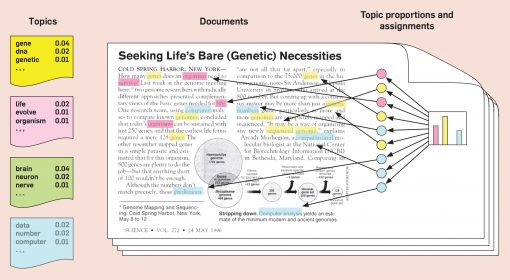

LDA는 각 **토픽의 단어 분포**, 즉 <u>특정 토픽에 특정 단어가 나타날 `확률`</u>을 추정합니다. 

예를 들어, 위의 그림의 좌측에서 
- `'Topics'`라고 적혀져 있는 부분을 보겠습니다. 
    - 그중 초록색 토픽에는 'brain'이라는 단어가 등장할 확률이 0.04입니다.

이번에는 그림 중앙의 
- `'Documents'`라고 적혀져 있는 부분을 보겠습니다. 
    - 주어진 문서에는 노란색, 분홍색, 하늘색 토픽이라는 세 가지 토픽이 존재하는 것 같습니다. 
    - 언뜻 보기에 노란색 네모가 가장 많은 것 같습니다.

이번에는 그림 우측에 
- `'Topic proportions and assignments'`를 보겠습니다. 
    - 그 아래에 있는 막대그래프는 문서에 존재하는 토픽의 비율을 시각화한 그래프입니다. 
    - 이 문서에는 세 가지 토픽이 존재하는데, 노란색 토픽의 비중이 가장 큰 것 같습니다. 
    - 다시 말해 이 문서는 노란색 토픽의 단어들이 가장 많이 등장하고 있으며, 노란색 토픽일 가능성이 큽니다. 
    
이렇게 LDA는 단어들의 분포로부터 **해당 문서의 토픽 분포를 추정**하게 됩니다.



### LDA의 가정

LDA는 전체 코퍼스, 즉 다수의 문서들로부터 토픽을 뽑아내기 위해서 하나의 가정을 염두에 두고 있습니다. 
- 모든 문서 하나, 하나가 작성될 때 그 문서의 작성자는 아래와 같은 생각을 했다는 가정입니다.

> '나는 이 문서를 작성하기 위해서 **이런 주제**들을 넣을거고, <u>이런 주제들을 위해서는</u> **이런 단어**들을 넣을 거야.'

#### LDA의 직관 이해하기

아래 자료에서 실습을 제외하고 1 ~ 4번까지 읽어보는 시간을 가지겠습니다.

- [위키독스: 잠재 디리클레 할당](https://wikidocs.net/30708)

Q. LSA와 LDA의 메커니즘을 각각 한 줄로 요약해서 설명해보세요.
- `LSA`는 DTM을 **차원 축소**하여 축소 차원에서 **근접 단어들을 토픽으로** 묶는 반면에, 
- `LDA`는 단어가 **특정 토픽에 존재할 확률**과 **문서에 특정 토픽이 존재할 확률**을 `결합 확률`로 추정하여 **토픽을 추출**합니다.

#### [LDA 아키텍처](https://serviceapi.nmv.naver.com/flash/convertIframeTag.nhn?vid=A008B9E1EAFC02C99F92928155487839090E&outKey=V1210ad4156cf64ce0c6a3e18cecaae499f6528784c999ca6541c3e18cecaae499f65&width=544&height=306) : 동영상 강의

## 4-11. LSA와 LDA (4) LDA 실습
: LDA(Latent Dirichlet Allocation)를 실습합니다.

---
LDA 실습은 LSA 실습 과정에서 만들어둔 전처리가 완료된 `train_data`를 재사용한다고 가정합니다. 해당 데이터는 역토큰화 과정을 거친 데이터입니다.



### TF-IDF 행렬 생성

`LDA`는 **DTM 또는 TF-IDF**를 <u>입력</u>으로 받을 수 있습니다. 여기서는 TF-IDF를 사용하겠습니다.

- `TfidfVectorizer`를 사용하여 TF-IDF 행렬을 생성해봅시다. 
- 단어의 수는 5,000개로 제한하겠습니다. 
- TF-IDF 행렬을 생성한 후에는 행렬의 크기를 확인합시다.


In [36]:
# TF-IDF matrix 생성
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000) # 상위 5,000개의 단어만 사용
tf_idf_matrix = tfidf_vectorizer.fit_transform(train_data) 

# TF-IDF 행렬의 크기를 확인해봅시다.
print('행렬의 크기 :', tf_idf_matrix.shape)

행렬의 크기 : (1054983, 5000)


### scikit-learn LDA Model 활용

사이킷런의 `LDA` 모델을 사용하여 학습합니다. <br>
LSA와 마찬가지로 동일한 사이킷런 패키지이므로 앞으로 진행되는 실습 과정은 LSA와 매우 유사합니다.
- 토픽의 개수는 10개로 정했습니다. 
- 이는 n_components의 인자값입니다. 

시간이 수분 정도 소요될 것이므로 느긋하게 기다려 주세요.

In [37]:
from sklearn.decomposition import LatentDirichletAllocation

# lda model 클래스 인스턴스 생성
lda_model = LatentDirichletAllocation(n_components=10, learning_method='online', random_state=777, max_iter=1)

# TF-IDF 행렬 model에 fit시키기
lda_model.fit_transform(tf_idf_matrix)

array([[0.0335099 , 0.0335099 , 0.0335099 , ..., 0.17024867, 0.0335099 ,
        0.0335099 ],
       [0.03365631, 0.03365631, 0.03365631, ..., 0.03365631, 0.03365631,
        0.03365631],
       [0.25184095, 0.0366096 , 0.0366096 , ..., 0.0366096 , 0.0366096 ,
        0.0366096 ],
       ...,
       [0.26687206, 0.02914502, 0.02914502, ..., 0.13007484, 0.02916018,
        0.28739608],
       [0.10378115, 0.02637829, 0.12325014, ..., 0.02637829, 0.02637829,
        0.02637829],
       [0.03376055, 0.03376055, 0.2255442 , ..., 0.03376055, 0.03376055,
        0.03376055]])

In [38]:
# 행렬 크기 확인
print(lda_model.components_.shape)

(10, 5000)


In [39]:
# 전체 코퍼스로부터 얻은 10개의 토픽과 각 토픽에서의 단어의 비중을 보겠습니다.

# LDA의 결과 토픽과 각 단어의 비중을 출력합시다

# 단어 집합 저장
terms = tfidf_vectorizer.get_feature_names_out() # 단어 집합. 5,000개의 단어가 저장됨.

# 
def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(5)) for i in topic.argsort()[:-n-1:-1]])

get_topics(lda_model.components_, terms)


Topic 1: [('australia', 9359.06334), ('sydney', 5854.97288), ('attack', 4784.76322), ('change', 4193.63035), ('year', 3924.88997)]
Topic 2: [('government', 6344.07413), ('charge', 5947.12292), ('man', 4519.7974), ('state', 3658.16422), ('live', 3625.10473)]
Topic 3: [('australian', 7666.65651), ('say', 7561.01807), ('police', 5513.22932), ('home', 4048.38409), ('report', 3796.04446)]
Topic 4: [('melbourne', 5298.35047), ('south', 4844.59835), ('death', 4281.78433), ('china', 3214.44581), ('women', 3029.28443)]
Topic 5: [('win', 5704.0914), ('canberra', 4322.0963), ('die', 4025.63057), ('open', 3771.65243), ('warn', 3577.47151)]
Topic 6: [('court', 5246.3124), ('world', 4536.86331), ('country', 4166.34794), ('woman', 3983.97748), ('crash', 3793.50267)]
Topic 7: [('election', 5418.5038), ('adelaide', 4864.95604), ('house', 4478.6135), ('school', 3966.82676), ('2016', 3955.11155)]
Topic 8: [('trump', 8189.58575), ('new', 6625.2724), ('north', 3705.40987), ('rural', 3521.42659), ('donald',

## 4-12. 텍스트 분포를 이용한 비지도 학습 토크나이저 (1) 형태소 분석기와 단어 미등록 문제
: 텍스트의 분포를 이용해서 토큰화를 수행하는 비지도 학습 토크나이저를 학습합니다.

---
지금까지 **띄어쓰기 단위의 단어 분포**를 이용해서 단어나 문서를 벡터화하는 방법에 대해 알아봤습니다. 

이번에는 **텍스트의 분포를 이용해서 토큰화**를 수행하는 `비지도 학습 토크나이저`에 대해서 알아봅시다.



### 형태소 분석기의 필요성

- 한국어 : `교착어` >> 교착어란 ~ "하나의 어절 = `어근(root)` + `접사(affix)`"
    - 하나의 **낱말(엄밀히는 하나의 어절)**이 
    - 하나의 **어근(root)(혹은 어간(stem))**과 
    - 각각 단일한 기능을 가지는 하나 이상의 **접사(affix)의 결합**으로 이루어져 있는 언어를 말합니다. 
    - 조사라는 품사는 교착어에만 존재합니다.

~ 영어랑 달리 `조사` 나 `접사` 존재. -> 띄어쓰기 단위 토큰화가 제대로 동작 안함

In [40]:
# 영어 토큰화 복습
en_text = "The dog ran back to the corner near the spare bedrooms"
print(en_text.split())

# 한글은?
kor_text = "사과의 놀라운 효능이라는 글을 봤어. 그래서 오늘 사과를 먹으려고 했는데 사과가 썩어서 슈퍼에 가서 사과랑 오렌지 사 왔어"
print(kor_text.split())

['The', 'dog', 'ran', 'back', 'to', 'the', 'corner', 'near', 'the', 'spare', 'bedrooms']
['사과의', '놀라운', '효능이라는', '글을', '봤어.', '그래서', '오늘', '사과를', '먹으려고', '했는데', '사과가', '썩어서', '슈퍼에', '가서', '사과랑', '오렌지', '사', '왔어']


> "사과" 란 단어가 네번 등장했는데 전부 다른 단어로 인식
> - 이를 해결하기 위해 "형태소 분석기" 필요
> - 예를들어 `Okt`

In [41]:
from konlpy.tag import Okt

tokenizer = Okt()
print(tokenizer.morphs(kor_text))

['사과', '의', '놀라운', '효능', '이라는', '글', '을', '봤어', '.', '그래서', '오늘', '사과', '를', '먹으려고', '했는데', '사과', '가', '썩어서', '슈퍼', '에', '가서', '사과', '랑', '오렌지', '사', '왔어']


### 단어 미등록 문제

하지만 기존의 형태소 분석기는 `등록된 단어를 기준`으로 `형태소를 분류`해 내어 
- **새롭게 만들어진 단어를 인식하기 어렵다**는 특징이 있습니다.



In [42]:
print(tokenizer.morphs('모두의연구소에서 자연어 처리를 공부하는 건 정말 즐거워'))

['모두', '의', '연구소', '에서', '자연어', '처리', '를', '공부', '하는', '건', '정말', '즐거워']


> "모두의연구소" 라는 단어를 인식 못함

그렇다면 텍스트 데이터에서 
- 특정 문자 시퀀스가 **함께 자주 등장**하는 빈도가 높고, 
- 앞뒤로 조사 또는 완전히 다른 단어가 등장하는 것을 고려해서 
- 해당 문자 시퀀스를 형태소라고 판단하는 형태소 분석기라면 어떨까요?

예를 들어, 
- '모두의연구소'라는 문자열이 자주 연결되어 등장한다면 형태소라고 판단하고, 
- '모두의연구소'라는 단어 앞, 뒤에 '최고', 'AI', '실력'과 같은 독립된 다른 단어들이 계속해서 등장한다면 
- '모두의연구소'를 형태소로 파악하는 식이지요. 

이런 아이디어를 가진 형태소 분석기가 `soynlp`입니다.





## 4-13. 텍스트 분포를 이용한 비지도 학습 토크나이저 (2) soynlp
: 품사 태깅, 형태소 분석 등을 지원하는 한국어 형태소 분석기 soynlp를 학습합니다.

---

`soynlp`는 품사 태깅, 형태소 분석 등을 지원하는 한국어 형태소 분석기입니다.

- <u>**비지도 학습**으로 형태소 분석</u>을 한다는 특징을 갖고 있으며, 
- 데이터에 자주 등장하는 단어들을 형태소로 분석합니다.

soynlp 형태소 분석기는 **내부적으로 단어 점수표로 동작**합니다. 

이 점수는 `응집 확률(cohesion probability)` 과 `브랜칭 엔트로피(branching entropy)` 를 활용합니다.



### soynlp 실습

In [4]:
# soynlp 깃허브에서 제공하는 예제 말뭉치를 다운로드합니다.

import urllib.request

txt_filename = os.getenv('HOME')+'/aiffel/topic_modelling/data/2016-10-20.txt'

urllib.request.urlretrieve("https://raw.githubusercontent.com/lovit/soynlp/master/tutorials/2016-10-20.txt",\
                            filename=txt_filename)

('/aiffel/aiffel/topic_modelling/data/2016-10-20.txt',
 <http.client.HTTPMessage at 0x7fa9fc193280>)

In [5]:
# 다운받은 말뭉치를 문서 단위로 분리

from soynlp import DoublespaceLineCorpus

# 말뭉치에 대해서 다수의 문서로 분리
corpus = DoublespaceLineCorpus(txt_filename)

# 문서 수
len(corpus)

30091

In [45]:
# 상위 3개의 문서 출력(공백이 아닌 문서에 화해)

i = 0
for document in corpus:
  if len(document) > 0:
    print(document)
    i = i+1
  if i == 3:
    break

19  1990  52 1 22
오패산터널 총격전 용의자 검거 서울 연합뉴스 경찰 관계자들이 19일 오후 서울 강북구 오패산 터널 인근에서 사제 총기를 발사해 경찰을 살해한 용의자 성모씨를 검거하고 있다 성씨는 검거 당시 서바이벌 게임에서 쓰는 방탄조끼에 헬멧까지 착용한 상태였다 독자제공 영상 캡처 연합뉴스  서울 연합뉴스 김은경 기자 사제 총기로 경찰을 살해한 범인 성모 46 씨는 주도면밀했다  경찰에 따르면 성씨는 19일 오후 강북경찰서 인근 부동산 업소 밖에서 부동산업자 이모 67 씨가 나오기를 기다렸다 이씨와는 평소에도 말다툼을 자주 한 것으로 알려졌다  이씨가 나와 걷기 시작하자 성씨는 따라가면서 미리 준비해온 사제 총기를 이씨에게 발사했다 총알이 빗나가면서 이씨는 도망갔다 그 빗나간 총알은 지나가던 행인 71 씨의 배를 스쳤다  성씨는 강북서 인근 치킨집까지 이씨 뒤를 쫓으며 실랑이하다 쓰러뜨린 후 총기와 함께 가져온 망치로 이씨 머리를 때렸다  이 과정에서 오후 6시 20분께 강북구 번동 길 위에서 사람들이 싸우고 있다 총소리가 났다 는 등의 신고가 여러건 들어왔다  5분 후에 성씨의 전자발찌가 훼손됐다는 신고가 보호관찰소 시스템을 통해 들어왔다 성범죄자로 전자발찌를 차고 있던 성씨는 부엌칼로 직접 자신의 발찌를 끊었다  용의자 소지 사제총기 2정 서울 연합뉴스 임헌정 기자 서울 시내에서 폭행 용의자가 현장 조사를 벌이던 경찰관에게 사제총기를 발사해 경찰관이 숨졌다 19일 오후 6시28분 강북구 번동에서 둔기로 맞았다 는 폭행 피해 신고가 접수돼 현장에서 조사하던 강북경찰서 번동파출소 소속 김모 54 경위가 폭행 용의자 성모 45 씨가 쏜 사제총기에 맞고 쓰러진 뒤 병원에 옮겨졌으나 숨졌다 사진은 용의자가 소지한 사제총기  신고를 받고 번동파출소에서 김창호 54 경위 등 경찰들이 오후 6시 29분께 현장으로 출동했다 성씨는 그사이 부동산 앞에 놓아뒀던 가방을 챙겨 오패산 쪽으로 도망간 후였다  김 경위는 오패산 터널 입구 오른쪽의 급경사에서 성씨에

soynlp는 비지도학습 형태소 분석기이므로 기존의 형태소 분석기와는 달리 학습 과정을 거쳐야 합니다. 

전체 코퍼스로부터 `응집 확률`과 `브랜칭 엔트로피` 단어 점수표를 만드는 과정이지요. 

`WordExtractor.extract()`를 통해서 전체 코퍼스에 대해 단어 점수표를 계산할 수 있습니다.



In [6]:
from soynlp.word import WordExtractor

# 인스턴스
word_extractor = WordExtractor()
# 학습
word_extractor.train(corpus)
# 단어점수표
word_score_table = word_extractor.extract()

training was done. used memory 0.796 Gb
all cohesion probabilities was computed. # words = 223348
all branching entropies was computed # words = 361598
all accessor variety was computed # words = 361598


### soynlp의 응집 확률(cohesion probability)

응집 확률은 `내부 문자열(substring)`이 얼마나 **응집**하여 자주 등장하는지를 판단하는 척도입니다. 

응집 확률은 
- 문자열을 **문자 단위로 분리**하여 내부 문자열을 만드는 과정에서, 
- <u>왼쪽부터 순서대로 문자를 추가</u>하면서 
- 각 문자열이 주어졌을 때 **그다음 문자가 나올 확률을 계산**하여 **누적 곱을 한 값**입니다. 

이 값이 높을수록 전체 코퍼스에서 이 문자열 시퀀스는 하나의 단어로 등장할 가능성이 높습니다. 수식은 아래와 같습니다.

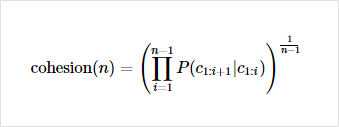

- 예시: "반포한강공원에" ~ 각 내부 문자열의 스코어를 구하는 과정:
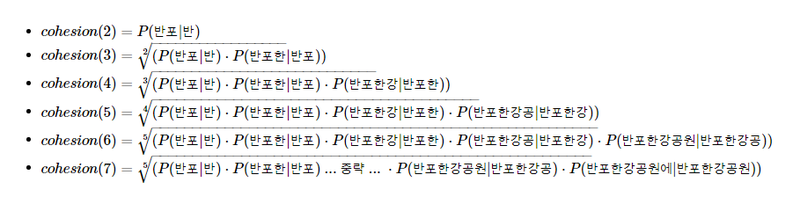

실습 :

In [7]:
word_score_table["반포한"].cohesion_forward

0.08838002913645132

In [8]:
word_score_table["반포한강"].cohesion_forward

0.19841268168224552

In [9]:
word_score_table["반포한강공"].cohesion_forward

0.2972877884078849

In [10]:
word_score_table["반포한강공원"].cohesion_forward

0.37891487632839754

In [11]:
word_score_table["반포한강공원에"].cohesion_forward

0.33492963377557666

응집 확률이 최대화가 되는 내부 문자열 구간은 '반포한강공원'입니다. 다시 말해 '반포한강공원'이 하나의 단어일 확률이 높습니다.

### soynlp의 브랜칭 엔트로피(branching entropy)

`브랜칭 엔트로피(Branching Entropy)` 는 **확률 분포의 엔트로피값**을 사용합니다. 

이는 주어진 문자열에서 **다음 문자가 등장할 수 있는 가능성을 판단하는 척도**입니다. 

브랜칭 엔트로피를 주어진 문자 시퀀스에서 다음 문자 예측을 위해 헷갈리는 정도라고 비유해 봅시다. <br>
브랜칭 엔트로피의 값은 **하나의 완성된 단어에 가까워질수록** **문맥으로 인해 정확히 예측할 수 있게 되므로 점차 줄어듭니다.** 실습해 볼게요.

In [12]:
word_score_table["디스"].right_branching_entropy

1.6371694761537934

In [13]:
word_score_table["디스플"].right_branching_entropy

-0.0

In [14]:
word_score_table["디스플레"].right_branching_entropy

-0.0

In [15]:
word_score_table["디스플레이"].right_branching_entropy

3.1400392861792916

'디스' 다음에는 다양한 문자가 올 수 있으니까 `1.63`이라는 값을 가지는 반면, <br>
'디스플'이라는 문자열 다음에는 다음 문자로 '레'가 오는 것이 너무나 명백하기 때문에 `0`이란 값을 가집니다.<br>
'디스플레' 다음도 마찬가지겠죠. 다음 문자가 '이'라는 사실이 너무나 명백해서 `0`이란 값을 가집니다.

그런데 '디스플레이' 다음에는 어떤 값을 가질까요? `갑자기 값이 급증`

'디스플레이'라는 문자 시퀀스 다음에는 조사나 다른 단어가 나올 수 있는 다양한 경우가 있을 수 있기 때문입니다. <br>
즉 하나의 단어가 끝나면 `그 경계 부분부터 다시 브랜칭 엔트로피값이 증가`함을 의미합니다. 그러면 이 값으로 단어를 판단하는 것이 가능하겠죠?

soynlp 패키지는 이렇게 계산한 점수를 사용해 `두 가지 문자열 토큰화 방법`을 제공합니다.

1. soynlp의 `LTokenizer`
2. 최대 점수 토크나이저(`MaxScoreTokenizer`)

### LTokenizer

한국어는 띄어쓰기 단위로 나눈 어절 토큰이 주로 `L 토큰` + `R 토큰`의 형식을 가질 때가 많습니다. 예를 들어서 `'공원에'`는 `'공원 + 에'`로 나눌 수 있겠지요. 또는 '공부하는'은 '공부 + 하는'으로 나눌 수도 있을 것입니다. 

L 토크나이저는 L 토큰 + R 토큰으로 나누되, **점수가 가장 높은 L 토큰을 찾아내는 분리 기준**을 가지고 있습니다.

In [16]:
from soynlp.tokenizer import LTokenizer

scores = {word:score.cohesion_forward for word, score in word_score_table.items()}
l_tokenizer = LTokenizer(scores=scores)
l_tokenizer.tokenize("국제사회와 우리의 노력들로 범죄를 척결하자", flatten=False)

[('국제사회', '와'), ('우리', '의'), ('노력', '들로'), ('범죄', '를'), ('척결', '하자')]

### MaxScoreTokenizer

최대 점수 토크나이저(`MaxScoreTokenizer`)는 **띄어쓰기가 되어 있지 않은 문장**에서 **점수가 높은 글자 시퀀스를 순차적으로 찾아내는 토크나이저**입니다. 

띄어쓰기가 되어 있지 않은 문장을 넣어서 토큰화된 결과를 점수를 통해 알아보겠습니다.

In [17]:
from soynlp.tokenizer import MaxScoreTokenizer

maxscore_tokenizer = MaxScoreTokenizer(scores=scores)
maxscore_tokenizer.tokenize("국제사회와우리의노력들로범죄를척결하자")

['국제사회', '와', '우리', '의', '노력', '들로', '범죄', '를', '척결', '하자']

### Keyword

1. Vectorization
    1. BoW(Bag of Word)
        1. Keras Tokenizer
            1. vocavulary
        2. scikit-learn CountVectorizer ~ DTM
    2. DTM
        1. Cosine Similarity
    3. TF-IDF
        1. TfidVectorizer
2. Topic modeling
    1. LSA(Latent Semantic Analysis)
        1. SVD
        2. Truncated SVD
    2. [LDA(Latent Dirichlet Alloction)](https://wikidocs.net/30708)
3. unsupervised learning tokenizer
    1. soynlp
        1. 단어 점수표
            1. 응집확률(cohesion probability)
            2. 브랜칭 엔트로피(branching entropy)
        2. tokenizing
            1. LTokenizer
            2. MaxScoreTokenizer
        